In [37]:
#load in libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Problem 01

In [38]:
#open all the csv file
af = pd.read_csv("problem_01/A.csv")
bf = pd.read_csv("problem_01/B.csv")
cf = pd.read_csv("problem_01/C.csv")
df = pd.read_csv("problem_01/D.csv")

In [39]:
#check if there are missing values
af.isna().sum()
bf.isna().sum()
cf.isna().sum()
df.isna().sum()

x    0
y    0
dtype: int64

In [40]:
df.head()

,x,y
0,8,6.58
1,8,5.76
2,8,7.71
3,8,8.84
4,8,8.47


### 1a) calculate sample average and sample variance

##### Dataframe A

In [41]:
#get the sample mean for x and y
#USING .MEAN() TO GET THE SAMPLE AVERAGE

#sample mean for x
ax = af['x'].mean()
#sample mean for y
ay = af['y'].mean()
print(" The sample mean for x is:",ax,'\n',"sample mean for y is",ay)


#get the sample variance for x and y
#USING .VAR()FUNCTION TO GET VARIANCE

#sample variance for x
axv = af['x'].var()
#sample variance for y
ayv = af['y'].var()
print(" The sample variance for x is:",axv,'\n',"sample variance for y is",ayv)


 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909093
 The sample variance for x is: 11.0 
 sample variance for y is 4.127269090909091


##### Dataframe B

In [42]:
#get the sample mean for x and y

#sample mean for x
bx = bf['x'].mean()
#sample mean for y
by = bf['y'].mean()
print(" The sample mean for x is:",bx,'\n',"sample mean for y is",by)

#get the sample variance for x and y

#sample variance for x
bxv = bf['x'].var()
#sample variance for y
byv = bf['y'].var()
print(" The sample variance for x is:",bxv,'\n',"sample variance for y is",byv)

 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909091
 The sample variance for x is: 11.0 
 sample variance for y is 4.127629090909091


##### Dataframe C

In [43]:
#get the sample mean for x and y

#sample mean for x
cx = cf['x'].mean()
#sample mean for y
cy = cf['y'].mean()
print(" The sample mean for x is:",cx,'\n',"sample mean for y is",cy)

#get the sample variance for x and y

#sample variance for x
cxv = cf['x'].var()
#sample variance for y
cyv = cf['y'].var()
print(" The sample variance for x is:",cxv,'\n',"sample variance for y is",cyv)

 The sample mean for x is: 9.0 
 sample mean for y is 7.500000000000001
 The sample variance for x is: 11.0 
 sample variance for y is 4.12262


##### Dataframe D

In [44]:
#get the sample mean for x and y

#sample mean for x
dx = df['x'].mean()
#sample mean for y
dy = df['y'].mean()
print(" The sample mean for x is:",dx,'\n',"sample mean for y is",dy)

#get the sample variance for x and y

#sample variance for x
dxv = df['x'].var()
#sample variance for y
dyv = df['y'].var()
print(" The sample variance for x is:",dxv,'\n',"sample variance for y is",dyv)

 The sample mean for x is: 9.0 
 sample mean for y is 7.50090909090909
 The sample variance for x is: 11.0 
 sample variance for y is 4.12324909090909


#####  Summary statistics compare across the data sets
As we can see from below all the sample mean and variance fo each dataset it seems that the sample average and sample variance for X is the same there is a small flucutation with the y sample average but shouldn't make any differences, there is a slight difference between y sample variance as every y sample variance seems to be around the same except for y sample variance from dataframe C and D as its slightly smaller than other y variance
###### DATAFRAME A:
 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909093
 The sample variance for x is: 11.0 
 sample variance for y is 4.127269090909091
###### DATAFRAME B:
 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909091
 The sample variance for x is: 11.0 
 sample variance for y is 4.127629090909091
###### DATAFRAME C:
 The sample mean for x is: 9.0 
 sample mean for y is 7.500000000000001
 The sample variance for x is: 11.0 
 sample variance for y is 4.12262
###### DATAFRAME D:
 The sample mean for x is: 9.0 
 sample mean for y is 7.50090909090909
 The sample variance for x is: 11.0 
 sample variance for y is 4.12324909090909

### 1b) Design matrix for each dataset

In [45]:
#use patsy's library to build the design matrix
import patsy

In [46]:
#Matrix for A
ya,Xa = patsy.dmatrices("y~x", data = af, return_type = 'dataframe')
#print(Xa)
#print(Xa.design_info)

In [47]:
#Matrix for B
yb, Xb = patsy.dmatrices("y~x", data = bf, return_type = 'dataframe')
#print(Xb)

In [48]:
#Matrix for C
yc,Xc = patsy.dmatrices("y~x", data = cf, return_type = 'dataframe')
#print(Xc)

In [49]:
#Matrix for D
yd,Xd = patsy.dmatrices("y~x", data = df, return_type = 'dataframe')
#print(Xd)

### 1C) Calculate MLEs

$(X^TX)^{-1}X^Ty$

##### MLEs for A

In [50]:
mod = sm.OLS(ya, Xa)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00217
Time:                        20:57:01   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [51]:
#convert the columns to ndarray
xac = Xa.to_numpy()
yac = ya.to_numpy()

In [52]:
#get the dot product of Xmat and ycol
#transpose the Xa data 
np.dot(np.transpose(xac), yac)

array([[ 82.51],
       [797.6 ]])

In [53]:
# take the matrix inverse
np.linalg.inv(np.dot(np.transpose(xac), xac))

array([[ 0.82727273, -0.08181818],
       [-0.08181818,  0.00909091]])

In [54]:
# find the MLEs
np.dot(np.linalg.inv(np.dot(np.transpose(xac), xac)), np.dot(np.transpose(xac), yac))

array([[3.00009091],
       [0.50009091]])

In [55]:
print(res.params)

Intercept    3.000091
x            0.500091
dtype: float64


##### MLEs for B

In [56]:
mod = sm.OLS(yb,Xb)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00218
Time:                        20:57:01   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.0

In [57]:
xbc = Xb.to_numpy()
ybc = yb.to_numpy()

In [58]:
np.dot(np.transpose(xbc),xbc)

array([[  11.,   99.],
       [  99., 1001.]])

In [59]:
np.linalg.inv(np.dot(np.transpose(xbc),xbc))

array([[ 0.82727273, -0.08181818],
       [-0.08181818,  0.00909091]])

In [60]:
np.dot(np.linalg.inv(np.dot(np.transpose(xbc), xbc)), np.dot(np.transpose(xbc), ybc))

array([[3.00090909],
       [0.5       ]])

In [61]:
#check the MLEs
print(res.params)

Intercept    3.000909
x            0.500000
dtype: float64


##### MLEs for C

In [62]:
mod = sm.OLS(yc,Xc)

In [63]:
#convert to ndarray
xcc = Xc.to_numpy()
ycc = yc.to_numpy()

In [64]:
np.dot(np.transpose(xcc),xcc)

array([[  11.,   99.],
       [  99., 1001.]])

In [65]:
# find the MLEs
np.dot(np.linalg.inv(np.dot(np.transpose(xcc), xcc)), np.dot(np.transpose(xcc), ycc))

array([[3.00245455],
       [0.49972727]])

In [66]:
print(res.params)

Intercept    3.000909
x            0.500000
dtype: float64


##### MLEs for D

In [67]:
mod = sm.OLS(yd,Xd)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00216
Time:                        20:57:01   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.0

In [68]:
xdc = Xd.to_numpy()
ydc = yd.to_numpy()

In [69]:
np.dot(np.transpose(xdc),xdc)

array([[  11.,   99.],
       [  99., 1001.]])

In [70]:
np.dot(np.linalg.inv(np.dot(np.transpose(xdc), xdc)), np.dot(np.transpose(xdc),ycc))

array([[ 9.399],
       [-0.211]])

In [71]:
print(res.params)

Intercept    3.001727
x            0.499909
dtype: float64


##### A.csv MLEs:
Intercept=3.000091,
x=0.500091
##### B.csv MLEs:
Intercept=3.000909,
x=0.500000
##### C.csv MLEs:
Intercept=3.000909,
x=0.500000
##### D.csv MLEs:
Intercept=3.001727,
x=0.499909

##### Conclusion:
For all the intercept in mles are very close, the x value for the all mles are extremely close hoovering around 0.50000 except for x-value at D.csv where it's 0.49999 but if you round it up it would be the same

### 1d) Calculate the Mean Squared Error (MSE)

In [72]:
#using sklearn's linear model to get the mean squared error
from sklearn import linear_model
#using sklearn's metrics to check if the mse result is correct
from sklearn.metrics import mean_squared_error

##### MSE for A.csv

In [73]:
#data for the linear regression model
x = af[['x']]
y = af[['y']]
#implementing the regression model
lm = linear_model.LinearRegression()
lm.fit(x,y)
#check the coefficient
print(lm.coef_)

[[0.50009091]]


In [74]:
#MSE for A.csv
np.mean((lm.predict(x)-y)**2)

y    1.251154
dtype: float64

In [75]:
#check the mse value 
mean_squared_error(y,lm.predict(x))

1.2511536363636362

##### MSE for B.csv

In [76]:
#data for the linear regression model
x = bf[['x']]
y = bf[['y']]
#implementing the model
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
#use numpy.mean to get the mse value 
np.mean((lm.predict(x)-y)**2)

y    1.25239
dtype: float64

In [78]:
#check using metrics.mse
mean_squared_error(y,lm.predict(x))

1.2523900826446281

##### MSE for C.csv

In [79]:
#data for linear regression model
x = cf[['x']]
y = cf[['y']]
#implementing the linear regression 
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#implement np.mean to get the mse value
np.mean((lm.predict(x)-y)**2)

y    1.250563
dtype: float64

In [81]:
#using metrics to check the mse value
mean_squared_error(y,lm.predict(x))

1.2505628925619836

##### MSE for D.csv

In [82]:
#data for the linear regression model
x = df[['x']]
y = df[['y']]
#implement the linear regression model
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#implement np.mean to get the mse value
np.mean((lm.predict(x)-y)**2)

y    1.249317
dtype: float64

In [84]:
#using metrics to double check if the mse value is correct
mean_squared_error(y,lm.predict(x))

1.249317272727273

##### A.csv MSE
y=1.251154

##### B.csv MSE
y=1.25239

##### C.csv MSE
y=1.250563

##### D.csv MSE
y=1.249317

##### Conclusion:
All the MSE value are hovering around 1.25 some of a and c are .01 and .02 bigger and d is .01 smaller other that theres not much deviation from 1.25


### 1e) R-squared values for each model

##### The $R^2$value for A.csv

In [85]:
#implementing sklearn library for linear regression to get the r^2 value
from sklearn import linear_model
#implementing sklearn.metrics to check the r^2 value
from sklearn.metrics import r2_score as r2

In [86]:
#create the x and y value for the linear regression
x = af[['x']]
y = af[['y']]
#calling the linear regression function from linear_model
lm = linear_model.LinearRegression()
#fit the variable in an linear regression
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
rs = lm.score(x,y)
print("The R^2 value for A.csv is:",rs)

The R^2 value for A.csv is: 0.666542459508775


In [88]:
#check the r^2 value
r2(y,lm.predict(x))

0.666542459508775

##### The $R^2$value for B.csv

In [89]:
#create the x and y value for the linear model
x = bf[['x']]
y = bf[['y']]
#implementing the linear regression
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
#getting the r^2 value for the model
rs = lm.score(x,y)
print("The R^2 value for B.csv is:",rs)

The R^2 value for B.csv is: 0.6662420337274844


In [91]:
#check the r^2 value
r2(y,lm.predict(x))

0.6662420337274844

##### The $R^2$value for C.csv

In [92]:
#create the x and y value for the linear model
x = cf[['x']]
y = cf[['y']]
#implementing the linear model
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
#getting the r^2 value
rs = lm.score(x,y)
print("The R^2 value for C.csv is:",rs)

The R^2 value for C.csv is: 0.6663240410665592


In [94]:
#check the r^2 value
r2(y,lm.predict(x))

0.6663240410665592

##### The $R^2$value for D.csv

In [95]:
X = df[['x']]
y = df[['y']]
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
rs = lm.score(x,y)
print("The R^2 value for D.csv is:", rs)

The R^2 value for D.csv is: 0.09862533386071981


In [97]:
#check the r^2 value
r2(y,lm.predict(x))

0.09862533386071981

##### A.csv $R^2$ 
The R^2 value for A.csv is: 0.666542459508775
##### B.csv $R^2$ 
The R^2 value for B.csv is: 0.6662420337274844
##### C.csv $R^2$ 
The R^2 value for C.csv is: 0.6663240410665592
##### D.csv $R^2$ 
The R^2 value for D.csv is: 0.6667072568984653

##### Conclusion

##### 1f) compare MSE to $R^2$ Value

The R^2 value for the model is better fit because the value for the MSE is over one after reading through multiple documentation and the slides from class it seems that the greater the MSE value the less accurate it is so therefore
the R^2 value for the model would be better suited.

##### 1g) Scatter plot

In [98]:
#import libraries necessary to create the scatterplot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#####
from mlxtend.plotting import plot_linear_regression

In [99]:
import seaborn as sns; sns.set()
#sns.set(color_codes = True)

##### Scatter plot for A.csv

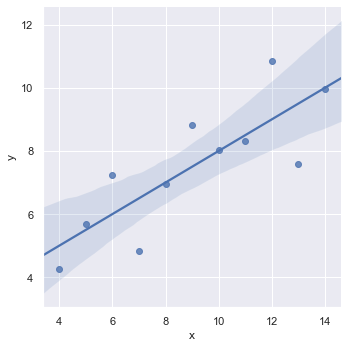

In [100]:
sns.lmplot(x='x', y='y', data=af)

##### Scatter plot for B.csv

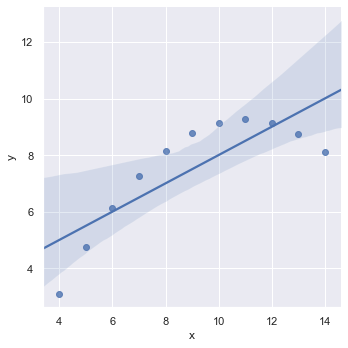

In [101]:
sns.lmplot(x='x',y='y',data=bf)

##### Scatter plot for C.csv

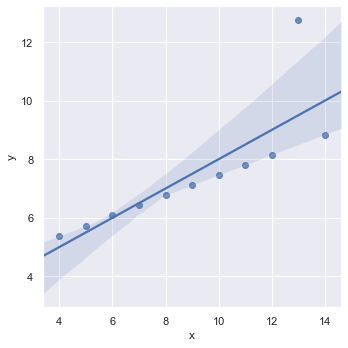

In [102]:
sns.lmplot(x='x',y='y',data=cf)

##### Scatter plot for D.csv

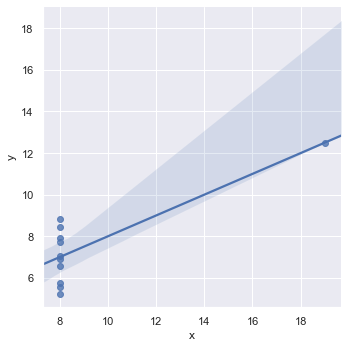

In [103]:
sns.lmplot(x='x',y='y',data=df)

In [104]:
#import necessary library to complete the task
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

### 2a)

In [105]:
#calculate the mu trend
def calcmu(x,b0,b1):
    mu = []
    for i in x:
        mu.append(b0 + b1*i)
    return mu

In [106]:
#upper and lower confidence level 
def updwn(arr,sigma):
    returnArr = [] 
    for element in arr:
        returnArr.append(element+2*sigma)
    return returnArr

In [107]:
#variable quantities 
b0 = 0.5
b1 = 2.5
sigma = 1.25
x = [-3,-2,-1,0,1,2,3]
mu = calcmu(x,b0,b1)

In [108]:
#95 ci = 2 sig || uper and lower bound
upper = updwn(mu, 2*sigma)
lower = updwn(mu, -2*sigma)

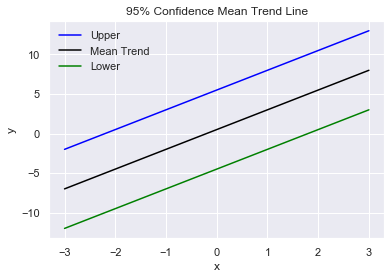

In [109]:
#draw mean trend line with 95 confidence interval 
plt.title("95% Confidence Mean Trend Line")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,upper, color="blue", label="Upper")
plt.plot(x,mu, color="black", label="Mean Trend")
plt.plot(x,lower, color="green", label="Lower")
plt.legend()

### 2B)

In [110]:
#integrate the 0 to infintiy to get the probabiliyt of y which is greater than 0
#input the start and end value in the function 
def gpy(num1,num2):
    area = []
    for i in mu:
#Gaussian PDF 
        def gpdf(x):
            value = stats.norm.pdf(x,i,sigma)
            return value
        valuex = (integrate.quad(gpdf,num1,num2))
        area.append(valuex[0])
    return area

Text(0.5, 1.0, 'probability of y>0')

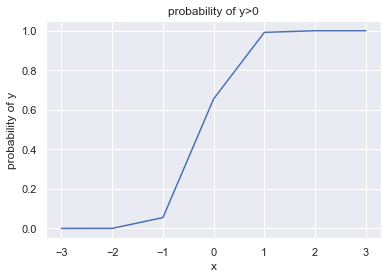

In [111]:
#plot probability when y > 0
sigma = 1.25
plt.plot(x,gpy(0,np.inf))
plt.xlabel("x")
plt.ylabel("probability of y")
plt.title("probability of y>0")

### 2C)

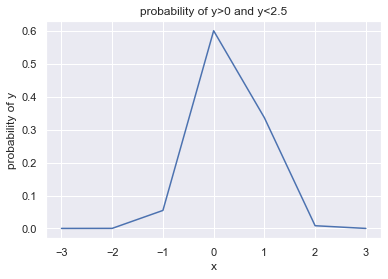

In [112]:
#x-label
plt.xlabel("x")
#y-label
plt.ylabel("probability of y")
#header
plt.title("probability of y>0 and y<2.5")
plt.plot(x,gpy(0,2.5))

### 2D)

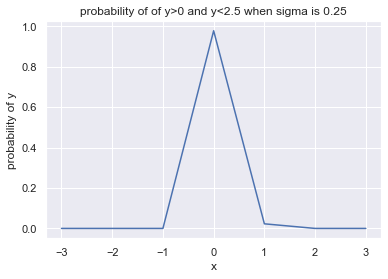

In [113]:
#noise of 0.25 so sigma = 0.25
sigma = 0.25
plt.xlabel("x")
plt.ylabel("probability of y")
plt.title("probability of of y>0 and y<2.5 when sigma is 0.25")
plt.plot(x,gpy(0,2.5))

### 2E)

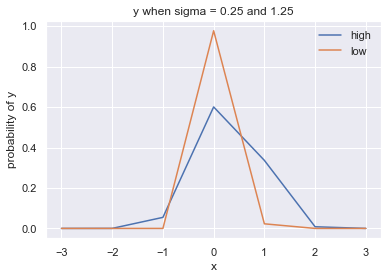

In [114]:
#x-axis
plt.xlabel("x")
#y-axis
plt.ylabel("probability of y")
#header of the graph
plt.title("y when sigma = 0.25 and 1.25")
#standard deviation
sigma = 1.25

###########################################################
#label noise data
high_noise = plt.plot(x,gpy(0,2.5), label='high')
sigma = 0.25
low_noise = plt.plot(x,gpy(0,2.5), label='low')
plt.legend()

# 3

In [115]:
p3high = pd.read_csv("problem_03/high_noise_data.csv")
p3low = pd.read_csv("problem_03/low_noise_data.csv")

In [198]:
#MLE for calculating true mean
p3b0 = -1 
p3b1 = 1
p3b2 = 0.5
p3b3 = -0.25

In [199]:
#compare x values from 2 datasets and take one as x value to get ture mean 
p3xhigh = p3high['x']
p3xlow  = p3low['x']
p3yhigh = p3high['y']
p3ylow = p3low['y']
set(p3xhigh) == set(p3xlow)

True

In [200]:
#get x values 
p3x = p3xlow  = p3low['x']

In [201]:
#fucntion to calculate true mean with equation provided 
def getTrueMean(x):
    mean = []
    for i in x:
        mu = (p3b0 + p3b1*i + p3b2*i**2 + p3b3*i**3)
        mean.append(mu)
    return mean

In [204]:
truemean = getTrueMean(p3x)
sigma = 0.55
p3lowupper = getDev(truemean,2*sigma)
p3lowlower = getDev(truemean,-2*sigma)

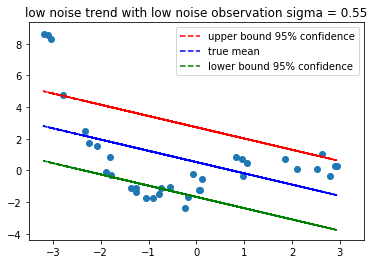

In [221]:
#plot true mean and with 95% confidence 
plotMean(p3x,p3lowupper,'red',"upper bound 95% confidence")
plotMean(p3x,truemean,'blue',"true mean")
plotMean(p3x,p3lowlower,'green',"lower bound 95% confidence")
#set x range to -3.5 to 3.5
plt.xlim(-3.5, 3.5) 
#plot low points of low noise observations 
plt.scatter(p3x,p3ylow)
plt.title("low noise trend with low noise observation sigma = 0.55")
plt.legend()

3b)

In [222]:
sigma = 3.5
p3highupper = getDev(truemean,2*sigma)
p3highlower = getDev(truemean,-2*sigma)

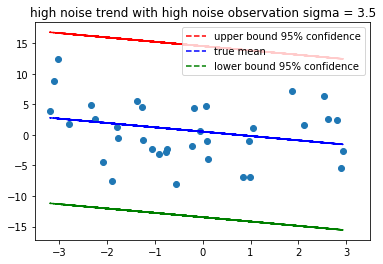

In [224]:
#plot true mean and with 95% confidence 
plotMean(p3x,p3highupper,'red',"upper bound 95% confidence")
plotMean(p3x,truemean,'blue',"true mean")
plotMean(p3x,p3highlower,'green',"lower bound 95% confidence")
#set x range to -3.5 to 3.5
plt.xlim(-3.5, 3.5) 
#plot low points of low noise observations 
plt.scatter(p3x,p3yhigh)
plt.title("high noise trend with high noise observation sigma = 3.5")
plt.legend()

3c)

In [320]:

p3x2 = []
for i in p3x:
    p3x2.append(i**2)

p3x3 = []
for i in p3x:
    p3x3.append(i**3)

In [348]:

p3df = pd.DataFrame()
p3df.insert(0, 'x', p3low['x'])
p3df.insert(1, 'x2', p3x2)
p3df.insert(2, 'x3', p3x3)
p3df.insert(3, 'y_low', p3low['y'])
p3df.head()

,x,x2,x3,y_low
0,2.802495,7.853978,22.010733,-0.369818
1,-1.778598,3.163409,-5.626432,-0.283916
2,-0.771495,0.595205,-0.459197,-1.487797
3,-0.554536,0.307510,-0.170525,-1.037194
4,2.932007,8.596666,25.205486,0.267219


In [349]:

p3y,p3X = dmatrices('y_low ~ x + x2 + x3', data = p3df, return_type='dataframe')

In [350]:

p3ynp = p3y.to_numpy()
p3Xnp = p3X.to_numpy()

In [351]:

def printMLEp3(txt,arr):
    print(txt, "\nβ0=", arr[0], "β1=",arr[1], "β2=", arr[2], "β3=", arr[3])

In [352]:
#call calcMLE functino from problem 1, same calculation but now with 4 results
printMLEp3("MLE (Low Noise)", calcMLE(p3Xnp,p3ynp))

MLE (Low Noise) 
β0= [-1.11254372] β1= [1.08798743] β2= [0.50319042] β3= [-0.26145691]


B1 and b2 are larger than b

3d)

In [353]:
#insert y_high
p3df.insert(4, 'y_high', p3high['y'])
p3df.head()

,x,x2,x3,y_low,y_high
0,2.802495,7.853978,22.010733,-0.369818,2.460998
1,-1.778598,3.163409,-5.626432,-0.283916,-0.561214
2,-0.771495,0.595205,-0.459197,-1.487797,-2.838286
3,-0.554536,0.307510,-0.170525,-1.037194,-8.001964
4,2.932007,8.596666,25.205486,0.267219,-2.674184


In [354]:
#create design matrix for y_high
p3yh,p3Xh = dmatrices('y_high ~ x + x2 + x3', data = p3df, return_type='dataframe')

In [355]:
#convert to numpy 
p3yhnp = p3yh.to_numpy()
p3Xhnp = p3Xh.to_numpy()

In [358]:
#call calcMLE functino from problem 1, same calculation but now with 4 results
printMLEp3("MLE (High Noise)", calcMLE(p3Xhnp,p3yhnp))

MLE (High Noise) 
β0= [-1.22275746] β1= [1.18410771] β2= [0.4921373] β3= [-0.24960733]


The calculated values for MLE is not as close to the true β values in comparison to the β values generated with the low noise data with β0 and β2 smaller than the true β value and β1 and β3 larger than the true β value 

### 4. Regression model threshold

In [ ]:
#import necessary library 
import pandas as pd
import numpy as np

In [ ]:
#grabbing the dataset using pandas
df = pd.read_csv("problem_04/glm_dataset.csv")
#cast the obeserved as a string so later we can stitch the mu_pred and observed togther
df['y'] = df['y'].astype(str)
df.head()

##### A)Threshold == 0.05

In [ ]:
#new dataframe for the threshold
af = df
#store all the mu prediction
mu_pred = []
#set the threshold
thrs = 0.05

for i in af['mu']:
    if i >= thrs:
        mu_pred.append('1')
    elif i < thrs:
        mu_pred.append('0')
        
#convert the list to a column in the dataframe
af['mu_pred'] = pd.Series(mu_pred)
#concat the the mu_pred and y to get the confusion matrix value
af['matx'] = af['mu_pred'].map(str) + af['y']

################################################################
#convert the numerical value in matx to confusion matrix value
cm=[]
#determine the values for the confusion matrix
for j in af['matx']:
    if (j == '11'):
        cm.append('TP')
    elif(j == '10'):
        cm.append('FP')
    elif(j == '01'):
        cm.append('FN')
    elif(j == '00'):
        cm.append('TN')
################################################################
atpc = cm.count("TP")
afnc = cm.count("FN")
afpc = cm.count("FP")
atnc = cm.count("TN")
################################################################
print("CONFUSION MATRIX: THRESHOLD == 0.05")
print("TP:",atpc)
print("FP:",afpc)
print("FN:",afnc)
print("TN:",atnc)
################################################################
#Sensitivity = True Positives / (True Positives + False Negatives)
asen = atpc/(atpc+afnc)
print("Sensitivity:",asen)
################################################################
#Specificity = True Negatives / (True Negatives + False Positives)
aspc = atnc/(atnc+afpc)
################################################################
#False Positive Rate = 1 - Specificity
#afpr = 1 - aspc
afpr = afpc/(afpc+atnc)
print("False Positive Rate:",afpr)

##### B)Threshold == 0.25

In [ ]:
#new dataframe for the threshold 
bf = df
#set the threshold
thrs = 0.25
#new list to store in the prediction value
mu_pred = []
#use a for loop to check if mu is above the 0.25 threshold
for i in bf['mu']:
    if i >= thrs:
        mu_pred.append(1)
    elif i < thrs:
        mu_pred.append(0)
    
#convert the mu_prediction list to a column
bf['mu_pred'] = pd.Series(mu_pred)
#concat the the mu_pred and y to get the confusion matrix value
bf['matx'] = bf['mu_pred'].map(str) + bf['y']
################################################################
#convert the numerical value in matx to confusion matrix value
cm=[]
#determine the values for the confusion matrix
for j in bf['matx']:
    if (j == '11'):
        cm.append('TP')
    elif(j == '10'):
        cm.append('FP')
    elif(j == '01'):
        cm.append('FN')
    elif(j == '00'):
        cm.append('TN')
################################################################
btpc = cm.count("TP")
bfnc = cm.count("FN")
bfpc = cm.count("FP")
btnc = cm.count("TN")
################################################################
print("CONFUSION MATRIX: THRESHOLD == 0.25")
print("TP:",btpc)
print("FP:",bfpc)
print("FN:",bfnc)
print("TN:",btnc)
################################################################
#Sensitivity = True Positives / (True Positives + False Negatives)
bsen = btpc/(btpc+bfnc)
print("Sensitivity:",bsen)
################################################################
#Specificity = True Negatives / (True Negatives + False Positives)
bspc = btnc/(btnc+bfpc)
################################################################
#False Positive Rate = 1 - Specificity
#bfpr = 1 - bspc
bfpr = bfpc/(bfpc+btnc)
print("False Positive Rate:",bfpr)

##### C)Threshold == 0.50

In [ ]:
#new dataframe for the threshold 
cf = df
#set the threshold
thrs = 0.50
#new list to store in the prediction value
mu_pred = []
#use a for loop to check if mu is above the 0.25 threshold
for i in bf['mu']:
    if i >= thrs:
        mu_pred.append(1)
    elif i < thrs:
        mu_pred.append(0)
    
#convert the mu_prediction list to a column
cf['mu_pred'] = pd.Series(mu_pred)
#concat the the mu_pred and y to get the confusion matrix value
cf['matx'] = cf['mu_pred'].map(str) + cf['y']
################################################################
#convert the numerical value in matx to confusion matrix value
cm=[]
#determine the values for the confusion matrix
for j in cf['matx']:
    if (j == '11'):
        cm.append('TP')
    elif(j == '10'):
        cm.append('FP')
    elif(j == '01'):
        cm.append('FN')
    elif(j == '00'):
        cm.append('TN')
################################################################
ctpc = cm.count("TP")
cfnc = cm.count("FN")
cfpc = cm.count("FP")
ctnc = cm.count("TN")
################################################################
print("CONFUSION MATRIX: THRESHOLD == 0.50")
print("TP:",ctpc)
print("FP:",cfpc)
print("FN:",cfnc)
print("TN:",ctnc)
################################################################
#Sensitivity = True Positives / (True Positives + False Negatives)
csen = ctpc/(ctpc+cfnc)
print("Sensitivity:",csen)
################################################################
#Specificity = True Negatives / (True Negatives + False Positives)
cspc = ctnc/(ctnc+cfpc)
################################################################
#False Positive Rate = 1 - Specificity
#cfpr = 1 - cspc
cfpr = cfpc/(cfpc+ctnc)
print("False Positive Rate:",cfpr)


##### D)Threshold == 0.75

In [ ]:
#new dataframe for the threshold 
df_d = df
#set the threshold
thrs = 0.75
#new list to store in the prediction value
mu_pred = []
#use a for loop to check if mu is above the 0.25 threshold
for i in df_d['mu']:
    if i >= thrs:
        mu_pred.append(1)
    elif i < thrs:
        mu_pred.append(0)
    
#convert the mu_prediction list to a column
df_d['mu_pred'] = pd.Series(mu_pred)
#concat the the mu_pred and y to get the confusion matrix value
df_d['matx'] = df_d['mu_pred'].map(str) + df_d['y']
################################################################
#convert the numerical value in matx to confusion matrix value
cm=[]
#determine the values for the confusion matrix
for j in df_d['matx']:
    if (j == '11'):
        cm.append('TP')
    elif(j == '10'):
        cm.append('FP')
    elif(j == '01'):
        cm.append('FN')
    elif(j == '00'):
        cm.append('TN')
################################################################
dtpc = cm.count("TP")
dfnc = cm.count("FN")
dfpc = cm.count("FP")
dtnc = cm.count("TN")
################################################################
print("CONFUSION MATRIX: THRESHOLD == 0.75")
print("TP:",dtpc)
print("FP:",dfpc)
print("FN:",dfnc)
print("TN:",dtnc)
################################################################
#Sensitivity = True Positives / (True Positives + False Negatives)
dsen = dtpc/(dtpc+dfnc)
print("Sensitivity:",dsen)
################################################################
#Specificity = True Negatives / (True Negatives + False Positives)
dspc = dtnc/(dtnc+dfpc)
################################################################
#False Positive Rate = 1 - Specificity
#dfpr = 1 - dspc
dfpr = dfpc/(dfpc+dtnc)
print("False Positive Rate:",dfpr)

##### E)Threshold == 0.95

In [ ]:
#new dataframe for the threshold 
ef = df
#set the threshold
thrs = 0.95
#new list to store in the prediction value
mu_pred = []
#use a for loop to check if mu is above the 0.25 threshold
for i in ef['mu']:
    if i >= thrs:
        mu_pred.append(1)
    elif i < thrs:
        mu_pred.append(0)
    
#convert the mu_prediction list to a column
ef['mu_pred'] = pd.Series(mu_pred)
#concat the the mu_pred and y to get the confusion matrix value
ef['matx'] = ef['mu_pred'].map(str) + ef['y']
################################################################
#convert the numerical value in matx to confusion matrix value
cm=[]
#determine the values for the confusion matrix
for j in ef['matx']:
    if (j == '11'):
        cm.append('TP')
    elif(j == '10'):
        cm.append('FP')
    elif(j == '01'):
        cm.append('FN')
    elif(j == '00'):
        cm.append('TN')
################################################################
etpc = cm.count("TP")
efnc = cm.count("FN")
efpc = cm.count("FP")
etnc = cm.count("TN")
################################################################
print("CONFUSION MATRIX: THRESHOLD == 0.95")
print("TP:",etpc)
print("FP:",efpc)
print("FN:",efnc)
print("TN:",etnc)
################################################################
#Sensitivity = True Positives / (True Positives + False Negatives)
esen = etpc/(etpc+efnc)
print("Sensitivity:",esen)
################################################################
#Specificity = True Negatives / (True Negatives + False Positives)
espc = etnc/(etnc+efpc)
################################################################
#False Positive Rate = 1 - Specificity
#efpr = 1 - espc
efpr = efpc/(efpc+etnc)
print("False Positive Rate:",efpr)



### CONCLUSION

##### A)CONFUSION MATRIX: THRESHOLD == 0.05
TP: 17
FP: 29
FN: 0
TN: 4
Sensitivity: 1.0
False Positive Rate: 0.8787878787878788


###### B)CONFUSION MATRIX: THRESHOLD == 0.25
TP: 13
FP: 12
FN: 4
TN: 21
Sensitivity: 0.7647058823529411
False Positive Rate: 0.36363636363636365


###### C)CONFUSION MATRIX: THRESHOLD == 0.50
TP: 9
FP: 5
FN: 8
TN: 28
Sensitivity: 0.5294117647058824
False Positive Rate: 0.15151515151515152


##### D)CONFUSION MATRIX: THRESHOLD == 0.75
TP: 6
FP: 1
FN: 11
TN: 32
Sensitivity: 0.35294117647058826
False Positive Rate: 0.030303030303030304


##### E)CONFUSION MATRIX: THRESHOLD == 0.95
TP: 1
FP: 0
FN: 16
TN: 33
Sensitivity: 0.058823529411764705
False Positive Rate: 0.0

##### F) ROC PLOT

In [ ]:
#importing required module
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
data = [[afpr,asen],[bfpr,bsen],[cfpr,csen],[dfpr,dsen],[efpr,esen]]
dfg = pd.DataFrame(data,columns = ['x','y'])
dfg.head(6)

In [ ]:
plt.plot(dfg['x'],dfg['y'],'ro')
plt.plot([0, 0], [1, 1], 'red', linewidth=10)
plt.plot(dfg['x'],dfg['y'])